## Flight Price Prediction

In [1]:
# Importing important libraries
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the training dataset
train_df=pd.read_excel(r'C:\Users\rk1066\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')

In [3]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# importing the test dataset
test_df=pd.read_excel(r'C:\Users\rk1066\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx')

In [6]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
# Appending both datasets into one for model building
df = train_df.append(test_df , sort = False)

In [8]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [9]:
df.shape

(13354, 11)

In [10]:
train_df.shape

(10683, 11)

In [11]:
test_df.shape

(2671, 10)

## EDA

In [12]:
#Checking names of the columns
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
# checking statistics of the target variable
df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

The max price is Rs 79K & min is 1.7K. The avg price is around 9K

The taget column here is Price. This is a linear regression problem. 

In [14]:
#Checking for the datatypes
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

All the features available in th edataset are object type

In [15]:
# Checking for the null values
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

We have many null values in the target column

In [16]:
# Checking the unique counts for each feature
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               132
Dep_Time            223
Arrival_Time       1451
Duration            374
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [17]:
print(df['Airline'].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


In [18]:
print(df['Source'].unique())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


In [19]:
print(df['Destination'].unique())

['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [20]:
print(df['Total_Stops'].unique())

['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


### Feature Engineering

Extracting the day, month & year info from the Date_of_Journey column using split method

In [22]:
df['Date'] =df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month'] =df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['year'] = df['Date_of_Journey'].str.split('/').str[2].astype(int)


In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


As we have extracted the day, month & year info we can drop the Date_of_Journey column

In [24]:
#Removing Date_of_Journey column
df.drop(columns='Date_of_Journey',inplace=True)

In [25]:
df['Dep_hour'] = df['Dep_Time'].str.split(':').str[0].astype('int')
df['Dep_minute'] = df['Dep_Time'].str.split(':').str[1].astype('int')

In [26]:
# Removing Dep time column
df.drop(columns='Dep_Time',inplace=True)

In [27]:
df['Arrival_hr'] = df['Arrival_Time'].str.split(':').str[0].astype('int')


In [28]:
df['Arrival_min'] = df['Arrival_Time'].str.split(' ').str[0]

In [29]:
df['Arrival_min'] 

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_min, Length: 13354, dtype: object

In [30]:
df['Arrival_min'] = df['Arrival_min'].str.split(':').str[1].astype('int')

In [31]:
df['Arrival_min']

0       10
1       15
2       25
3       30
4       35
        ..
2666    25
2667    55
2668    25
2669    15
2670    15
Name: Arrival_min, Length: 13354, dtype: int32

In [32]:
df.drop(columns='Arrival_Time',inplace=True)

In [33]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'year', 'Dep_hour',
       'Dep_minute', 'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  year             13354 non-null  int32  
 11  Dep_hour         13354 non-null  int32  
 12  Dep_minute       13354 non-null  int32  
 13  Arrival_hr       13354 non-null  int32  
 14  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [35]:
df['Total_Stops'].isnull().sum()

1

In [36]:
#We have 1 null value in Total stop column
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Dep_hour,Dep_minute,Arrival_hr,Arrival_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,45,9,25


In [37]:
# replacing null value with mean
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [38]:
df['Total_Stops'].isnull().sum()

0

In [39]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [40]:
#Non stop can be replaced with 0 
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0')

In [41]:
df['Total_Stops'].unique()

array(['0', '2 stops', '1 stop', '3 stops', '4 stops'], dtype=object)

In [42]:
df['Total_Stops'] = df['Total_Stops'].str.split(' ').str[0].astype('int')

In [43]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

Thus we have scuceessfully converted object type into numerical type

In [44]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'year', 'Dep_hour',
       'Dep_minute', 'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [45]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [46]:
df['Price'].isnull().sum()

2671

In [47]:
df['Price']=df['Price'].fillna(df['Price'].mean())

In [48]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Dep_hour,Dep_minute,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,16,50,21,35


In [49]:
# Checking for route column
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [50]:
df['Route1']=df['Route'].str.split('→').str[0]

In [51]:
df['Route2']=df['Route'].str.split('→').str[1]
df['Route3']=df['Route'].str.split('→').str[2]
df['Route4']=df['Route'].str.split('→').str[3]
df['Route5']=df['Route'].str.split('→').str[4]
df['Route6']=df['Route'].str.split('→').str[5]

In [52]:
df['Duration_hr']=df['Duration'].str.split(' ').str[0]

In [53]:
df['Duration_hr']=df['Duration_hr'].str[0]

In [54]:
df['Duration_hr'].fillna(0,inplace=True)

In [55]:
df['Duration_hr']=df['Duration_hr'].astype(int)

In [56]:
df['Duration_min']=df['Duration'].str.split(' ').str[1]

In [57]:
df['Duration_min']=df['Duration_min'].str[0]

In [58]:
df['Duration_min'].isnull().sum()

1286

In [59]:
df['Duration_min'].unique()

array(['5', '2', nan, '4', '3', '1'], dtype=object)

In [60]:
# replacing nan value with 0
df['Duration_min'].fillna(0,inplace=True)

In [61]:
df['Duration_min'].isnull().sum()

0

In [62]:
df['Duration_min']=df['Duration_min'].astype(int)

In [63]:
df.drop(columns='Duration',inplace=True)

In [64]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,year,...,Arrival_hr,Arrival_min,Route1,Route2,Route3,Route4,Route5,Route6,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,24,3,2019,...,1,10,BLR,DEL,NaN,NaN,NaN,NaN,2,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,1,5,2019,...,13,15,CCU,IXR,BBI,BLR,NaN,NaN,7,2


In [65]:
# droping the route column
df.drop(columns='Route',inplace=True)

In [66]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,year,Dep_hour,...,Arrival_hr,Arrival_min,Route1,Route2,Route3,Route4,Route5,Route6,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,22,...,1,10,BLR,DEL,NaN,NaN,NaN,NaN,2,5
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,5,...,13,15,CCU,IXR,BBI,BLR,NaN,NaN,7,2


In [67]:
# Dealing with the null values of price

In [68]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price                  0
Date                   0
Month                  0
year                   0
Dep_hour               0
Dep_minute             0
Arrival_hr             0
Arrival_min            0
Route1                 1
Route2                 1
Route3              4341
Route4             11397
Route5             13296
Route6             13352
Duration_hr            0
Duration_min           0
dtype: int64

In [69]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,year,Dep_hour,...,Arrival_hr,Arrival_min,Route1,Route2,Route3,Route4,Route5,Route6,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,22,...,1,10,BLR,DEL,NaN,NaN,NaN,NaN,2,5
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,5,...,13,15,CCU,IXR,BBI,BLR,NaN,NaN,7,2


In [70]:
#replacing nan values in Route columns with 0
df['Route1'] = df['Route1'].fillna('0')
df['Route2'] = df['Route2'].fillna('0')
df['Route3'] = df['Route3'].fillna('0')
df['Route4'] = df['Route4'].fillna('0')
df['Route5'] = df['Route5'].fillna('0')
df['Route6'] = df['Route6'].fillna('0')

In [71]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,year,Dep_hour,...,Arrival_hr,Arrival_min,Route1,Route2,Route3,Route4,Route5,Route6,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,22,...,1,10,BLR,DEL,0,0,0,0,2,5
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,5,...,13,15,CCU,IXR,BBI,BLR,0,0,7,2


# Data Statistics

In [72]:
df.describe()

,Total_Stops,Price,Date,Month,year,Dep_hour,Dep_minute,Arrival_hr,Arrival_min,Duration_hr,Duration_min
count,13354.000000,13354.000000,13354.000000,13354.000000,13354.0,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,0.826045,9087.064121,13.389846,4.710574,2019.0,12.513254,24.507264,13.396061,24.664146,2.802306,2.884080
std,0.674608,4124.447805,8.439060,1.165622,0.0,5.736273,18.832385,6.896145,16.559723,2.311866,1.621777
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,6135.250000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,1.000000,2.000000
50%,1.000000,9087.064121,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,2.000000,3.000000
75%,1.000000,11087.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,3.000000,4.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,9.000000,5.000000


In [73]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
year               0
Dep_hour           0
Dep_minute         0
Arrival_hr         0
Arrival_min        0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
Route6             0
Duration_hr        0
Duration_min       0
dtype: int64

### There are no null values in the dataset 

In [74]:
#Data Vizualization

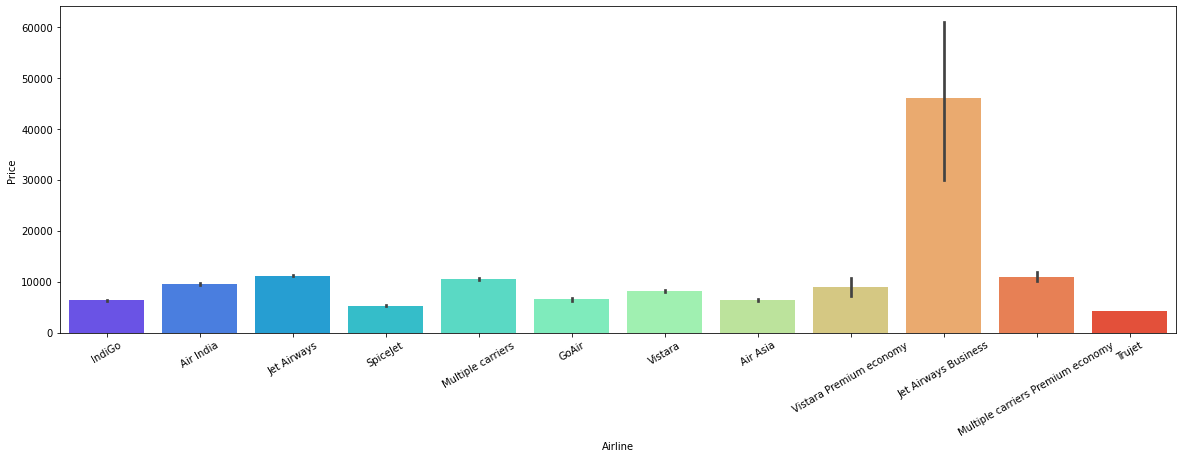

In [75]:
plt.figure(figsize=(20,6))
sns.barplot(x="Airline",y="Price",data=df,palette="rainbow")
plt.xticks(rotation=30)
plt.show()

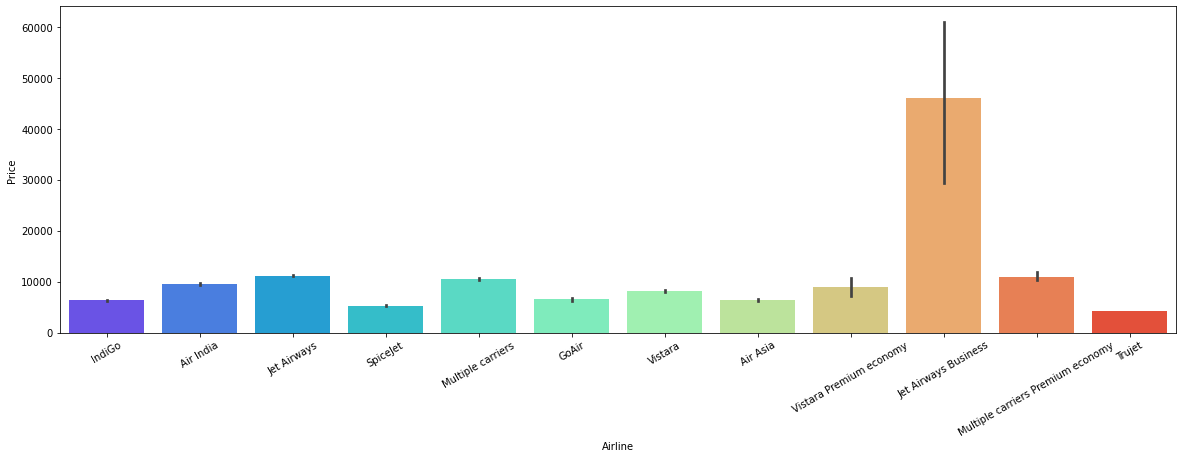

In [76]:
#Airline vs price
plt.figure(figsize=(20,6))
sns.barplot(x="Airline",y="Price",data=df,palette="rainbow")
plt.xticks(rotation=30)
plt.show()

In [77]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'year', 'Dep_hour', 'Dep_minute',
       'Arrival_hr', 'Arrival_min', 'Route1', 'Route2', 'Route3', 'Route4',
       'Route5', 'Route6', 'Duration_hr', 'Duration_min'],
      dtype='object')

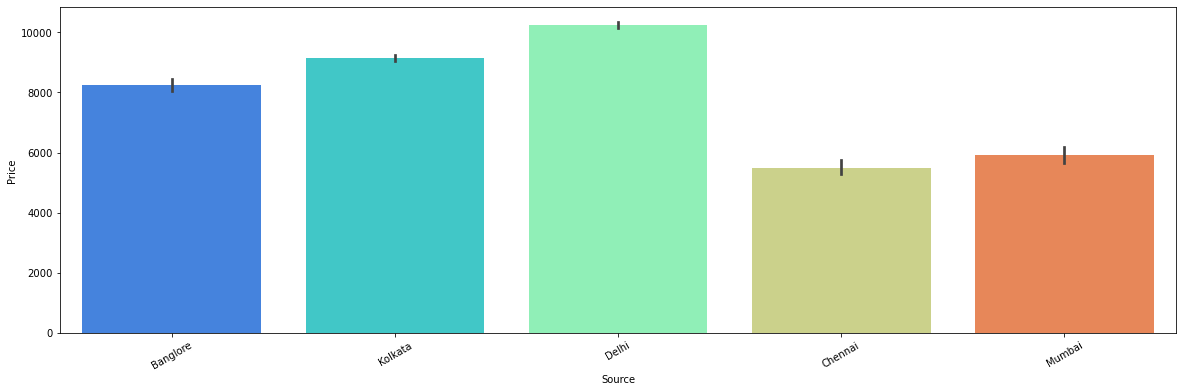

In [78]:
# Source vs Price
plt.figure(figsize=(20,6))
sns.barplot(x="Source",y="Price",data=df,palette="rainbow")
plt.xticks(rotation=30)
plt.show()


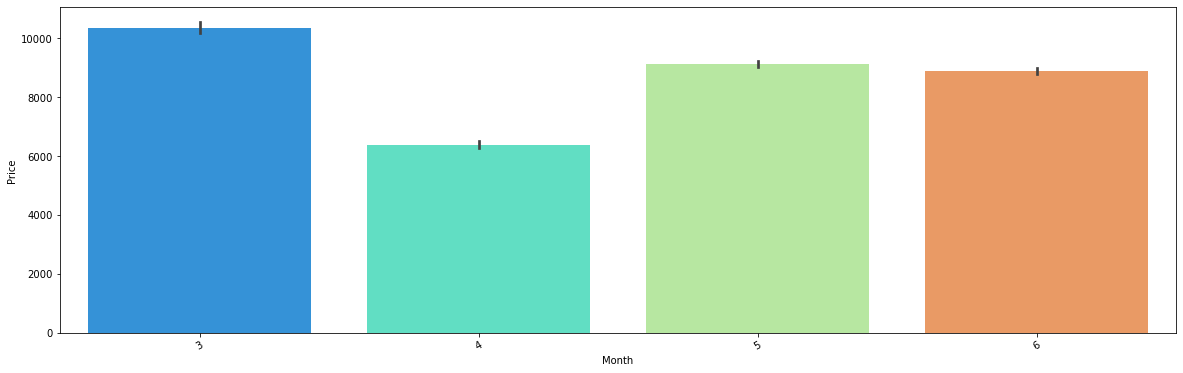

In [79]:
# Month vs Price
plt.figure(figsize=(20,6))
sns.barplot(x="Month",y="Price",data=df,palette="rainbow")
plt.xticks(rotation=30)
plt.show()


In [80]:
# The highest fare accounted for march month 

In [81]:
df['Month'].unique()

array([3, 5, 6, 4])

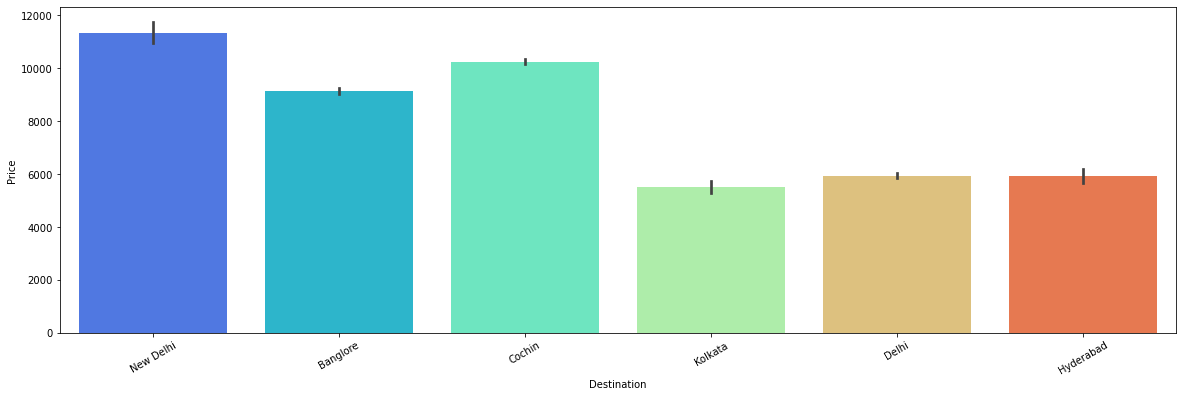

In [82]:
# Destination vs Price
plt.figure(figsize=(20,6))
sns.barplot(x="Destination",y="Price",data=df,palette="rainbow")
plt.xticks(rotation=30)
plt.show()


In [83]:
#New delhi has got the highest fare 

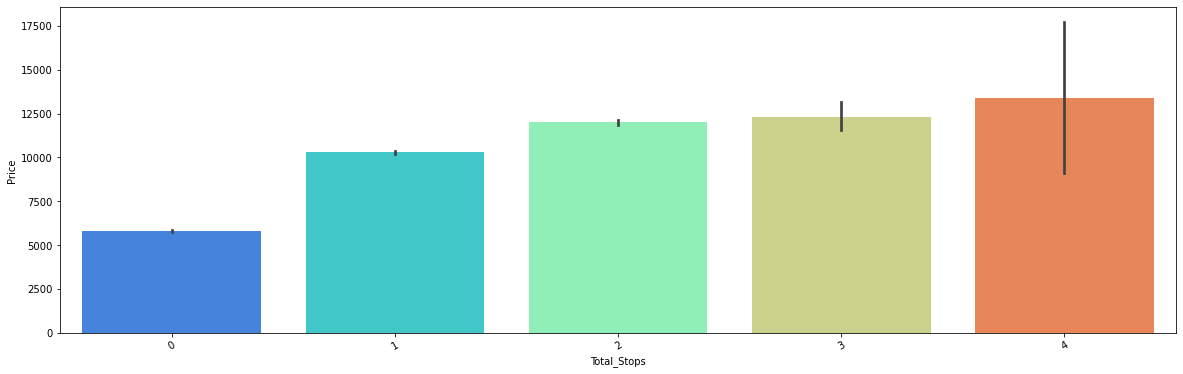

In [84]:
# Total stops vs Price
plt.figure(figsize=(20,6))
sns.barplot(x="Total_Stops",y="Price",data=df,palette="rainbow")
plt.xticks(rotation=30)
plt.show()

# Handling categorical data

In [85]:
# Converting categorical objectives into numerical type
#Importing Label encoder from sklearn library
from sklearn.preprocessing import LabelEncoder

In [86]:
le=LabelEncoder()
df["Airline"]=le.fit_transform(df["Airline"])
df["Source"]=le.fit_transform(df["Source"])
df["Destination"]=le.fit_transform(df["Destination"])
df["Additional_Info"]=le.fit_transform(df["Additional_Info"])
df["Route1"]=le.fit_transform(df["Route1"])
df["Route2"]=le.fit_transform(df["Route2"])
df["Route3"]=le.fit_transform(df["Route3"])
df["Route4"]=le.fit_transform(df["Route4"])
df["Route5"]=le.fit_transform(df["Route5"])
df["Route6"]=le.fit_transform(df["Route6"])

In [87]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,year,Dep_hour,...,Arrival_hr,Arrival_min,Route1,Route2,Route3,Route4,Route5,Route6,Duration_hr,Duration_min
0,3,0,5,0,8,3897.0,24,3,2019,22,...,1,10,1,13,30,13,5,1,2,5
1,1,3,0,2,8,7662.0,1,5,2019,5,...,13,15,3,25,1,3,5,1,7,2


In [88]:
# dropping unwanted columns
df.drop(columns='year',inplace =True)

In [89]:
#Segreating the data into train dataset and test dataset
df_train = df[0:10683]
df_test = df[10683:]

In [90]:
df_test.shape

(2671, 20)

In [91]:
# Checking for correlation
corr = df_train.corr()

In [92]:
corr

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_minute,Arrival_hr,Arrival_min,Route1,Route2,Route3,Route4,Route5,Route6,Duration_hr,Duration_min
Airline,1.000000,-0.013401,0.018479,-0.199411,-0.060802,-0.039520,0.026238,0.024643,-0.035194,-0.060044,-0.007491,-0.071089,0.035591,-0.061847,0.060988,0.261808,0.056832,0.012201,0.040896,-0.048639
Source,-0.013401,1.000000,-0.592574,0.192840,-0.022107,0.015998,0.004898,0.183268,0.059044,-0.056991,0.025632,0.021040,0.437755,0.035834,-0.269877,-0.076015,-0.008329,0.016046,-0.018777,-0.148241
Destination,0.018479,-0.592574,1.000000,-0.295481,0.026806,-0.071112,-0.040998,-0.364686,-0.072979,0.127892,-0.039710,0.017196,-0.483128,0.077710,0.408085,0.132148,0.009125,-0.023382,-0.111421,0.041449
Total_Stops,-0.199411,0.192840,-0.295481,1.000000,-0.082426,0.603883,-0.009472,0.054389,-0.061490,-0.002591,0.038123,-0.106939,0.428730,0.162229,-0.802542,-0.729373,-0.207430,-0.045511,0.148787,-0.088596
Additional_Info,-0.060802,-0.022107,0.026806,-0.082426,1.000000,-0.065478,-0.016337,-0.051478,-0.051010,-0.019339,0.026173,0.041311,0.015197,0.078014,0.166737,-0.042353,-0.030927,0.027039,0.010527,0.022258
Price,-0.039520,0.015998,-0.071112,0.603883,-0.065478,1.000000,-0.153738,-0.103651,0.006819,-0.024492,0.024264,-0.086155,0.182196,-0.087304,-0.592601,-0.316937,-0.055643,-0.018043,0.128606,-0.074095
Date,0.026238,0.004898,-0.040998,-0.009472,-0.016337,-0.153738,1.000000,-0.038378,0.002220,-0.008261,-0.003192,-0.017511,0.079905,-0.025062,0.022751,-0.018712,0.006611,0.014274,0.008768,-0.015538
Month,0.024643,0.183268,-0.364686,0.054389,-0.051478,-0.103651,-0.038378,1.000000,0.039112,-0.059238,-0.003941,-0.100626,0.230530,0.048467,-0.081520,-0.071507,0.001297,0.014199,0.002368,-0.052453
Dep_hour,-0.035194,0.059044,-0.072979,-0.061490,-0.051010,0.006819,0.002220,0.039112,1.000000,-0.024806,0.005215,0.067909,-0.044258,-0.126345,0.016132,0.047480,0.047010,0.012608,-0.010093,0.015503
Dep_minute,-0.060044,-0.056991,0.127892,-0.002591,-0.019339,-0.024492,-0.008261,-0.059238,-0.024806,1.000000,0.043054,-0.017594,-0.074208,0.091925,0.048743,-0.042955,0.005452,-0.013192,-0.003328,0.143596


<AxesSubplot:>

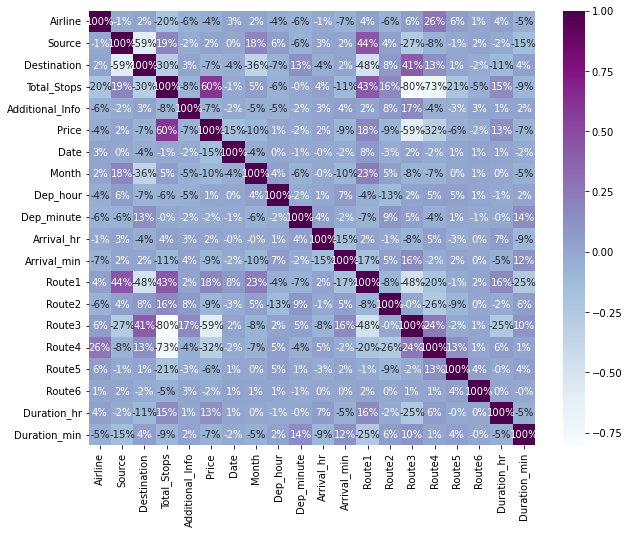

In [93]:
# Vizualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".0%",cmap="BuPu")

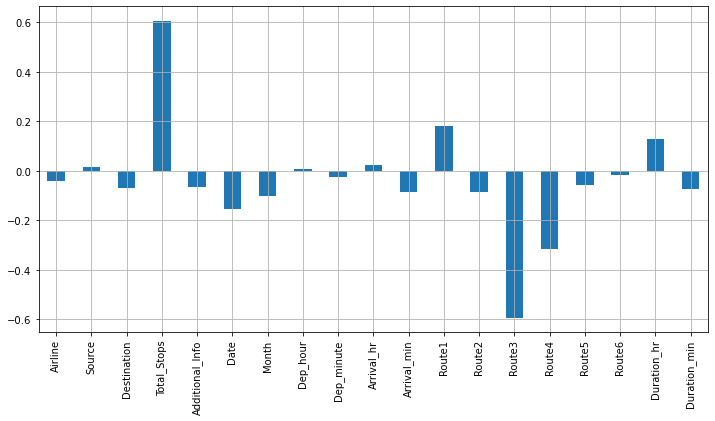

In [94]:
#correlation with target variable
plt.figure(figsize=(12,6))
df_train.drop("Price",axis=1).corrwith(df_train["Price"]).plot(kind="bar",grid=True)
plt.xticks(rotation="vertical")
plt.show()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  int32  
 1   Source           13354 non-null  int32  
 2   Destination      13354 non-null  int32  
 3   Total_Stops      13354 non-null  int32  
 4   Additional_Info  13354 non-null  int32  
 5   Price            13354 non-null  float64
 6   Date             13354 non-null  int32  
 7   Month            13354 non-null  int32  
 8   Dep_hour         13354 non-null  int32  
 9   Dep_minute       13354 non-null  int32  
 10  Arrival_hr       13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Route1           13354 non-null  int32  
 13  Route2           13354 non-null  int32  
 14  Route3           13354 non-null  int32  
 15  Route4           13354 non-null  int32  
 16  Route5           13354 non-null  int32  
 17  Route6       

# Removing outliers

In [96]:
from scipy.stats import zscore

In [97]:
z=np.abs(zscore(df_train))

In [98]:
threshold=3
print(np.where(z>3))

(array([   16,   123,   164,   185,   191,   249,   291,   365,   396,
         402,   402,   402,   458,   470,   482,   486,   510,   596,
         597,   628,   657,   673,   720,   785,   785,   826,   853,
         877,   919,   919,   936,   946,   959,   961,   972,   975,
        1010,  1014,  1043,  1138,  1196,  1203,  1211,  1218,  1218,
        1218,  1246,  1327,  1339,  1341,  1386,  1424,  1462,  1466,
        1478,  1558,  1591,  1596,  1628,  1629,  1654,  1665,  1665,
        1785,  1798,  1918,  1949,  1966,  2055,  2079,  2099,  2108,
        2151,  2172,  2172,  2172,  2185,  2205,  2360,  2405,  2481,
        2495,  2495,  2497,  2533,  2543,  2556,  2556,  2618,  2623,
        2623,  2633,  2633,  2635,  2670,  2693,  2697,  2718,  2718,
        2718,  2814,  2814,  2822,  2822,  2924,  2924,  3032,  3032,
        3082,  3104,  3111,  3111,  3157,  3157,  3183,  3220,  3220,
        3234,  3257,  3304,  3317,  3317,  3353,  3355,  3400,  3434,
        3448,  3453

In [99]:
df_new=df_train[(z<3).all(axis=1)]

In [100]:
df_new.shape

(10390, 20)

In [101]:
df_train.shape

(10683, 20)

In [102]:
p_loss=(10683-10390)/10683*100

In [103]:
p_loss

2.742675278479828

In [104]:
#data loss is 2.7%

## Feature selection

In [105]:
x=df_new.drop(columns='Price',axis=1)
y=df_new['Price']

In [106]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 50)

In [107]:
# Scaling the data using standard scaler
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [108]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[-0.41757292, -1.67674461,  2.48798017, ...,  0.        ,
        -0.33965035,  1.29977071],
       [-1.26944464,  0.88233728, -0.97588245, ...,  0.        ,
         1.82695519, -0.54335986],
       [ 0.00836294,  0.02930999, -0.28310993, ...,  0.        ,
        -0.77297145, -1.77211357],
       ...,
       [ 0.00836294, -1.67674461,  0.4096626 , ...,  0.        ,
         0.09367076, -1.77211357],
       [ 2.56397808, -1.67674461,  2.48798017, ...,  0.        ,
        -0.33965035,  0.68539385],
       [-1.26944464,  0.02930999, -0.28310993, ...,  0.        ,
         2.26027629, -0.54335986]])

## Model Building

In [109]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lg=lr.predict(x_test)
r2score=r2_score(y_test,pred_lg)
cvsscore=cross_val_score(LinearRegression(),x_train,y_train,cv=2).mean()
print(r2score)
print(cvsscore)

0.5731084610630999
0.5504138127924565


In [110]:
# Lasso
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
r2score=r2_score(y_test,pred_ls)
cvsscore=cross_val_score(Lasso(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.573163046619777
0.5508096939752858
0.02235335264449123


In [111]:
# Ridge
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
r2score=r2_score(y_test,pred_rd)
cvsscore=cross_val_score(Ridge(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.573133083774252
0.5508140370020956
0.022319046772156348


In [112]:
# ElasticNet
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
pred_en=en.predict(x_test)
r2score=r2_score(y_test,pred_en)
cvsscore=cross_val_score(ElasticNet(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.5691376673834679
0.5446981887916392
0.02443947859182871


In [113]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
ar=AdaBoostRegressor()
ar.fit(x_train,y_train)
pred_ad=ar.predict(x_test)
r2score=r2_score(y_test,pred_ad)
cvsscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.6805766305704306
0.6619823909760044
0.018594239594426187


In [114]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rg=RandomForestRegressor(n_estimators=88)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
r2score=r2_score(y_test,pred_rg)
cvsscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.9327888261493043
0.9199545284079259
0.012834297741378342


# RandomForestRegressor gives the best score of R2 as well as cross validation score
# accuracy= 93 % & cross val score of 91 %

In [116]:
#Saving the file
import pickle
filename="Flight price prediction"
pickle.dump(rg,open(filename,"wb"))